# PROBLEM

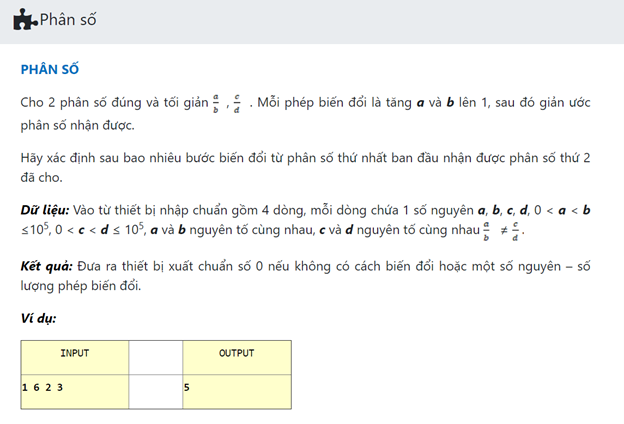

# ABSTRACTION

Với PhanSo1 và PhanSo2 tối giản, tìm số vòng lặp để PhanSo1 = PhanSo2 biết ở mỗi lần lặp, ta thực hiện biến đổi PhanSo1 = $\frac{a++}{b++}$ và sau đó tối giản PhanSo1.

# DECOMPOSITION 

- Ta nhận thấy có 3 bài toán:
    + Bài toán 1: Tối giản phân số => Tìm ƯCLN.
    + Bài toán 2: Xét tính khả thi của phép biến đổi PhanSo1 dựa vào việc so sánh tử và mẫu của 2 phân số.
    + Bài toán 3: Thực hiện biến đổi phân số nếu thỏa Bài Toán 2.


# PATTERN RECOGNITION & ALGORITHM DESIGN

- **Input**: a, b, c, d: PhanSo1 = $\frac{a}{b}$ và PhanSo2 = $\frac{c}{d}$ (a và b nguyên tố cùng nhau, c và d nguyên tố cùng nhau $\frac{a}{b}$≠$\frac{c}{d}$; 0 < a < b ≤10^5, 0 < c < d ≤ 10^5)
- **Output**: result (integer): 0 nếu không có cách biến đổi hoặc một số nguyên – số lượng phép biến đổi. 
- **Temp**:
    + temp (integer): biến tạm chứa giá trị của 1 trong 2 số cần tìm ước chung lớn nhất.
    + M, N (float): biến chứa giá trị PhanSo1 và PhanSo2 dưới dạng số thập phân. (Initialize: M = float(a/b), N = float(c/d)).
    + flag (boolean): biến chứa giá trị thể hiện tính khả thi khi thực hiện bài toán 2. (Initialize: flag = True).

- **Bài toán 1**: Duyệt Brute Force:
    + Trong khi mẫu khác 0:
        + Gán tử cho biến tạm temp.
        + Gán tử bằng mẫu.
        + Gán mẫu bằng phần dư của phép temp%mẫu.
    + Kết quả (ƯCLN) là giá trị của tử sau khi thoát khỏi vòng lặp trên.

=> Time Complexity: O(2n) với n là max(số chữ số của tử, số chữ số của mẫu). 

- **Bài toán 2** (True = Khả thi; False = Bất khả thi):
    + Nhận thấy cả tử và mẫu của 2 phân số đều dương => PhanSo1, PhanSo2 >0.
    + Ta chỉ cần xét Phân Số thực hiện các biến đổi có bằng 1 không và cả tử lẫn mẫu của nó có mâu thuẫn với Phân Số còn lại không (tử có cùng lớn/bé hơn mẫu không).
    + Xét 3 trường hợp:
        + PhanSo1 = 1: Dù có tăng dần tử và mẫu của PhanSo1 bao nhiêu thì vẫn sẽ bằng 1 => False.
        + PhanSo1 < 1:
            + Nếu PhanSo1<PhanSo2<1: Có nghĩa là tử số bé hơn mẫu số ở cả PhanSo1 và PhanSo2. => True.
            + Ngược lại => False.
        + PhanSo1 > 1:
            + Nếu PhanSo1>PhanSo2>1: Có nghĩa là tử số lớn hơn mẫu số ở cả PhanSo1 và PhanSo2. => True.
=> Time Complexity: O(1)

* Ghi chú: Khi nói PhanSo1 khả thi ý muốn nói PhanSo1 có khả năng thực hiện biến đổi theo đề bài để đạt được giá trị bằng PhanSo2 (cụ thể ở Bài toán 2).
- **Bài toán 3**: Duyệt Brute Force:
    + Trong khi PhanSo1 != PhanSo2 và flag != 0 (PhanSo1 khả thi):
        + Duyệt flag xem PhanSo1 có khả thi hay không. (Phòng các trường hợp khác ngoài flag initialize = 1 và PhanSo1 != PhanSo2 theo giả thiết).
        + a ++, b++.
        + Tìm ƯCLN của a và b mới vừa tăng 1.
        + Tối giản PhanSo1 mới bằng cách chia tử và mẫu lấy nguyên cho ƯCLN vừa tìm được.
        + result ++.
     + Nếu flag = 0 (PhanSo1 không khả thi hay không có phép biến đổi để PhanSo1 = PhanSo2):
         + result = 0.
     + Ngược lại, xuất ra result.
* => Time Complexity: O(2n.a.b). Với:
    + n là max(số chữ số của a, số chữ số của b) (sau mỗi lần a, b tăng 1 đơn vị).
    + a và b là tử và mẫu số của PhanSo1.

# IMPLEMENTATION

In [1]:
a = int(input())
b = int(input())
c = int(input())
d = int(input()) 

result = 0
flag = 1

def compute_gcd(x, y): 
    while(y): 
        x, y = y, x % y 
    return x 

def test(a, b, c, d):
    M = float(a/b)
    N = float(c/d)
    
    # M == 1
    if a==b:
        return 0
    
    #0< M < 1
    elif a<b:
        #M < N < 1 
        if M<N and N<1:
            return 1
        #(1 > M >= N) or (N >= 1)
        return 0
    
    #M > 1
    else:
        #M > N > 1
        if M>N and N>1:
            return 1
        #(1 < M <= N) or (N <= 1)
        return 0





while a*d != c*b and flag!=0:
    flag = test(a, b, c, d)
    a += 1
    b += 1
    gcd = int(compute_gcd(a, b))
    a = a // gcd
    b = b // gcd    
    result +=1

if flag == 0:
    result = 0
    
print(result)

1 
6
2
3
5
